# Analysis of stocks as per user input for given companies and time period

In [6]:
# this is important
%matplotlib inline

In [5]:
#Ishan- Importing the required packages
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Taking input for number of stocks to analyze and creating list of tickers for those Stocks

In [3]:
#Saad- taking user input for ticker symbol and no. of stocks instead of hard coding
def get_tick_input():
    try:
        n = int(input("Number of stocks you want to analyze:"))
        global ticker_list
        ticker_list = list()
        for i in range(n):
            tick = input("Input your stock ticker symbol: ")
            ticker_list.append(tick.upper())
        return ticker_list
    
    except ValueError:
        print('Please enter integer for number of stocks')

get_tick_input()

Number of stocks you want to analyze:4
Input your stock ticker symbol: AAPL
Input your stock ticker symbol: GOOGL
Input your stock ticker symbol: MSFT
Input your stock ticker symbol: IBM


['AAPL', 'GOOGL', 'MSFT', 'IBM']

# Taking input for start date and end date of analysis time period

In [4]:
#Saad - input for start date and end date as global variables
def get_time_period():
    global start_date
    global end_date
    start_year = int(input("Input Start Year [xxxx]:"))
    start_month = int(input("Input Start Month [1-12]:"))
    start_day = int(input("Input Start Day:"))
    end_year = int(input("Input End Year [xxxx]:"))
    end_month = int(input("Input End Month [1-12]:"))
    end_day = int(input("Input End Day:"))

    start_date = datetime.datetime(start_year, start_month, start_day)
    end_date = datetime.datetime(end_year, end_month, end_day)
get_time_period()

Input Start Year [xxxx]:2000
Input Start Month [1-12]:1
Input Start Day:1
Input End Year [xxxx]:2018
Input End Month [1-12]:12
Input End Day:1


In [6]:
#Importing the required data
from pandas_datareader import data as pdr
import fix_yahoo_finance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

# tickers = ['AAPL', 'MSFT', 'IBM', 'GOOGL']
tickers = ticker_list #Saad- switching from hard coded tickers to user input

# all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
df = get(tickers, start_date, end_date) 
df_i = df
df_c = df
df_n = df
df_i = get(tickers, start_date, end_date) #Saad - switching from hard code date to user input
df_i.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2000-01-03  4.017857  3.631696  3.745536  3.997768  133949200.0   
       2000-01-04  3.950893  3.613839  3.866071  3.660714  128094400.0   
       2000-01-05  3.948661  3.678571  3.705357  3.714286  194580400.0   
       2000-01-06  3.821429  3.392857  3.790179  3.392857  191993200.0   
       2000-01-07  3.607143  3.410714  3.446429  3.553571  115183600.0   

                   Adj Close  
Ticker Date                   
AAPL   2000-01-03   2.677157  
       2000-01-04   2.451444  
       2000-01-05   2.487319  
       2000-01-06   2.272070  
       2000-01-07   2.379695

# Plotting histogram of daily percentage change for each input stock

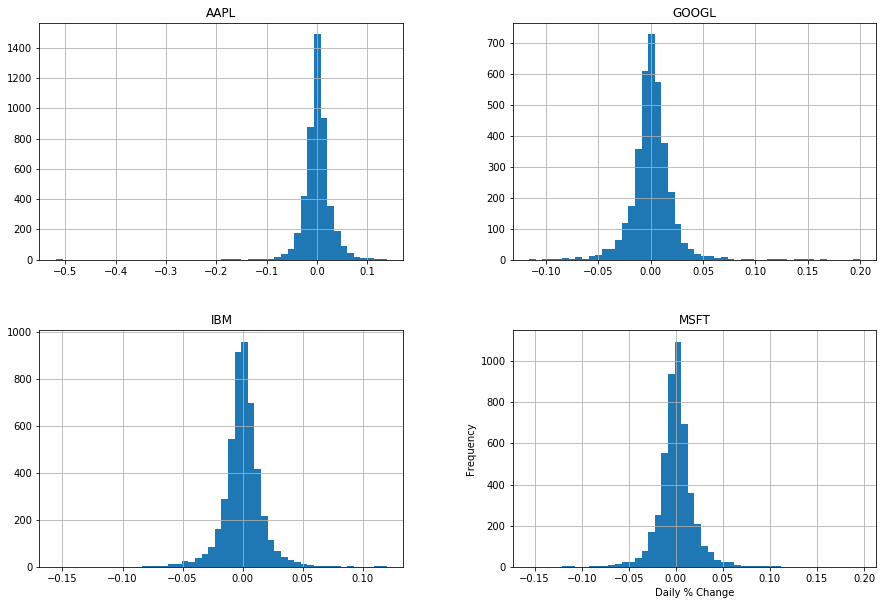

In [9]:
daily_close = df_i[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
# print(daily_close_px.head(100))

# Calculate the daily percentage change for `daily_close_px`
daily_pctchange = daily_close.pct_change()

daily_pctchange = daily_pctchange.iloc[1:]
# print(daily_pct_change.head(100))

# # Plot the distributions
histogram = daily_pctchange.hist(bins=50,figsize=(15,10))
plt.xlabel("Daily % Change")
plt.ylabel("Frequency")
plt.show()

# Plotting rolling time window for 50 days and 200 days with day to day price movement

AxesSubplot(0.125,0.2;0.775x0.68)


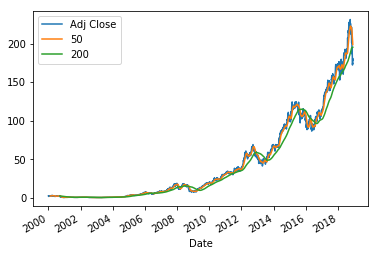

AxesSubplot(0.125,0.2;0.775x0.68)


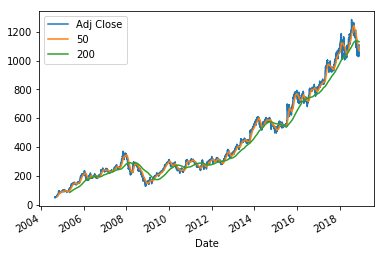

AxesSubplot(0.125,0.2;0.775x0.68)


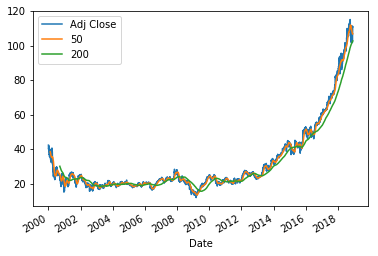

AxesSubplot(0.125,0.2;0.775x0.68)


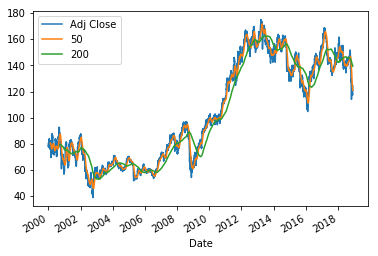

In [10]:
# Saad replacing indvidual code blocks to plot graph for each stock with one loop
for stock in ticker_list:
    ticker = pdr.get_data_yahoo(stock, 
                              start=start_date, 
                              end=end_date)

    # Isolate the adjusted closing prices 
    adj_close = ticker['Adj Close']
    adj_close = adj_close.dropna()

    # Short moving window rolling mean
    ticker['50'] = adj_close.rolling(window=30).mean()

    # Long moving window rolling mean
    ticker['200'] = adj_close.rolling(window=180).mean()

    # Plot the adjusted closing price, the short and long windows of rolling means
    print(ticker[['Adj Close','50', '200']].plot())

    plt.show()

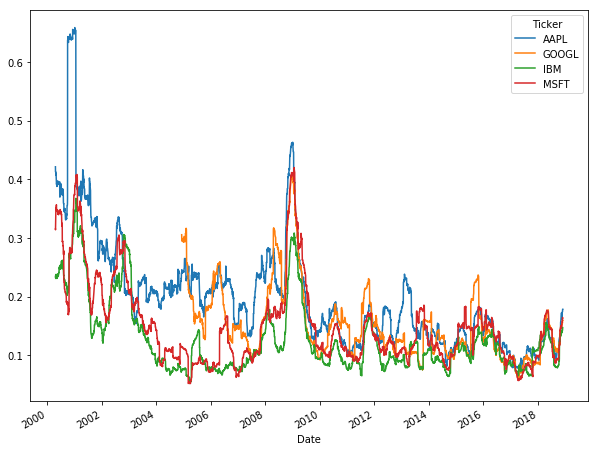

In [12]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
volatility = daily_pctchange.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
volatility.plot(figsize=(10, 8))

# Show the plot
plt.show()

In [10]:
# visualisation
import pandas_datareader.data as web
import fix_yahoo_finance as yf


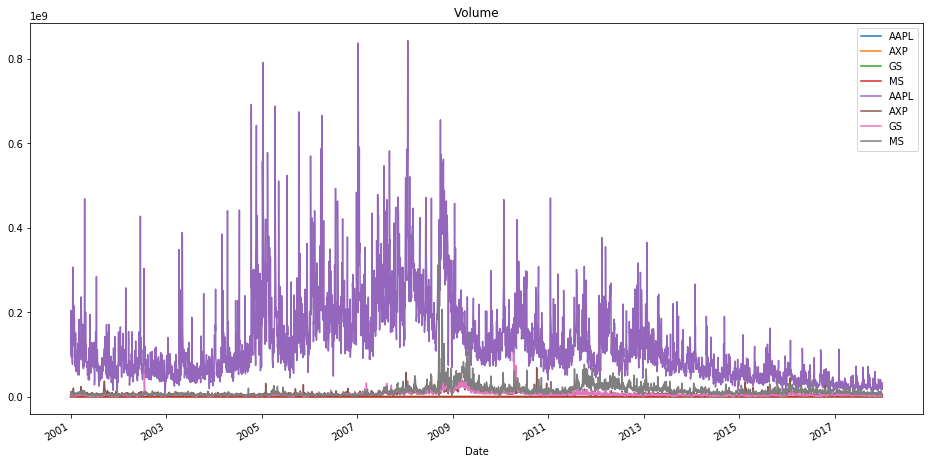

In [14]:
# Saad changed hard code to loop for any number of stocks and any tickers
start = start_date
end = end_date


df_adjclose = web.DataReader(ticker_list,'yahoo', start,end)['Adj Close']

for stock in ticker_list:
    df_adjclose[stock].plot(label = stock, figsize = (16,8), title = 'Adjusted Closing Price')
    # df_adjclose['IBM'].plot(label = 'IBM')
    # df_adjclose['MSFT'].plot(label = 'MSFT')
    # df_adjclose['FTEC'].plot(label = 'FTEC')
    plt.legend();

for stock in ticker_list:
    df_volume = web.DataReader(ticker_list,'yahoo', start,end)['Volume']
    df_volume[stock].plot(label = stock, figsize = (16,8), title = 'Volume')
    # df_volume['IBM'].plot(label = 'IBM')
    # df_volume['MSFT'].plot(label = 'MSFT')
    # df_volume['FTEC'].plot(label = 'FTEC')
    plt.legend();

# Changes made till here

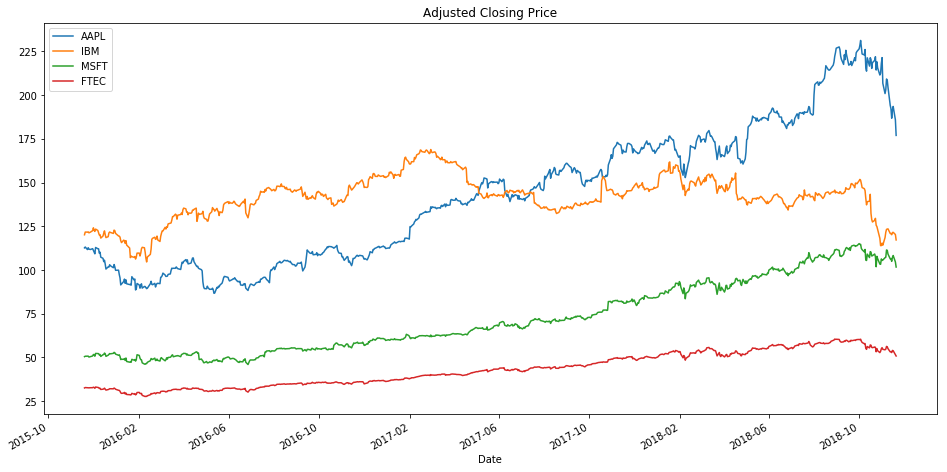

In [3]:
# Moving Average Code:

df_adjclose['AAPL'].plot(label = 'AAPL', figsize = (16,8), title = 'Adjusted Closing Price')
df_adjclose['IBM'].plot(label = 'IBM')
df_adjclose['MSFT'].plot(label = 'MSFT')
df_adjclose['FTEC'].plot(label = 'FTEC')
plt.legend();

In [1]:
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import pandas_datareader.data as web
import fix_yahoo_finance as yf

In [3]:
import pandas_datareader.data as web
import fix_yahoo_finance as yf
start = datetime.datetime(2015,11,19)
end = datetime.datetime(2018,11,19)
df = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)
df_ = web.DataReader(['AAPL','IBM','MSFT','FTEC'],'yahoo', start,end)[['Close','Open']]
df1 = df['Close']
df1_ = df['Adj Close']
rets = df1.pct_change()
df_ = df_.join(rets)

/Users/user/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


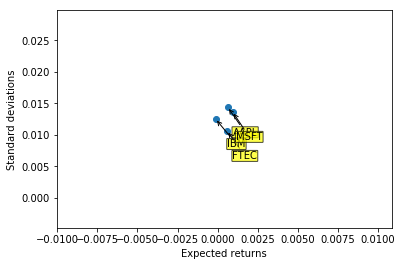

In [9]:
#Cassie - Basic Risk Analysis 2 - Standard Deviation and Expected Return for each stock
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.05', fc = 'yellow', alpha = 0.7),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()

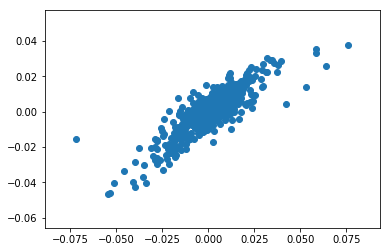

In [10]:
#Cassie The Relationship between each stock and ETF
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(rets.MSFT,rets.FTEC)

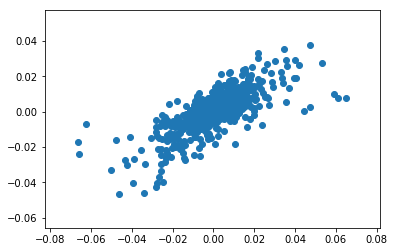

In [11]:
plt.scatter(rets.AAPL,rets.FTEC)

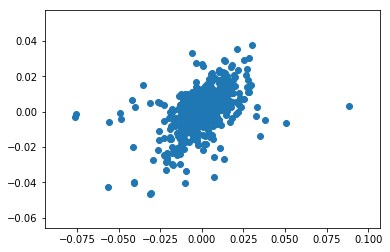

In [12]:
plt.scatter(rets.IBM,rets.FTEC)

In [13]:
# Cassie - Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Linear Regression
# Here ETF_Up is a binary variable
df_['ETF_Up'] = np.where(df_[('Close', 'FTEC')]>df_[('Open', 'FTEC')],1,0)
df_.dropna()
df_ = df_[[('Close', 'AAPL'),('Close', 'IBM'),('Close', 'MSFT'),('Open', 'AAPL'),('Open', 'IBM'),('Open', 'MSFT'),'AAPL','IBM','MSFT',('Open', 'FTEC'),('Close', 'FTEC'),'FTEC','ETF_Up']]
list(df_.columns.values)


[('Close', 'AAPL'),
 ('Close', 'IBM'),
 ('Close', 'MSFT'),
 ('Open', 'AAPL'),
 ('Open', 'IBM'),
 ('Open', 'MSFT'),
 'AAPL',
 'IBM',
 'MSFT',
 ('Open', 'FTEC'),
 ('Close', 'FTEC'),
 'FTEC',
 'ETF_Up']

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.5)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']


from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

testing_predictions  = model.predict(x_test)
model.score(x_test,y_test)

0.3918568657362448

In [15]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Logistic Regression
# Here ETF_UP is a binary variable
# Logistic Regression a better fit than Linear Regression
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_, test_size = 0.3)
x_train = train.iloc[0:,0:6]
y_train = train['ETF_Up']
x_test = test.iloc[0:,0:6]
y_test = test['ETF_Up']

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print(logistic_acc)

0.8464912280701754


In [16]:
x_total = df_.iloc[0:,0:6]
y_total = df_['ETF_Up']
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.Probit(y_total, x_total)
probit_res = model.fit()
probit_margeff = probit_res.get_margeff()
print('Parameters: ', probit_res.params)
print('Marginal effects: ')
print(probit_margeff.summary())

Optimization terminated successfully.
         Current function value: 0.349800
         Iterations 8
Parameters:  (Close, AAPL)    0.771101
(Close, IBM)     0.196883
(Close, MSFT)    1.618904
(Open, AAPL)    -0.767867
(Open, IBM)     -0.197540
(Open, MSFT)    -1.623546
dtype: float64
Marginal effects: 
       Probit Marginal Effects       
Dep. Variable:                 ETF_Up
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
('Close', 'AAPL')     0.1521      0.011     13.780      0.000       0.130       0.174
('Close', 'IBM')      0.0388      0.011      3.517      0.000       0.017       0.060
('Close', 'MSFT')     0.3194      0.023     13.629      0.000       0.273       0.365
('Open', 'AAPL')     -0.1515      0.011    -13.740      0.000      -0.173      -0.130
('Open', 'IBM')      -0.039

In [17]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(10,30, 50,100), 
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(1,2,4,6),
     
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=3,iid=False)
inputs = df_.iloc[0:,0:6]
outputs = df_['ETF_Up']
model.fit(inputs, np.ravel(outputs))
model.best_score_, model.best_params_

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(0.5192458099092431,
 {'max_features': 2, 'max_samples': 0.4, 'n_estimators': 100})

In [18]:
rf = BaggingClassifier(max_features=6,max_samples=0.9,n_estimators=60)
rf.fit(x_train,y_train)
rf_acc = rf.score(x_test,y_test)
print(rf_acc)

0.6008771929824561


In [19]:
# Machine Learning Analysis II - Use AAPL, MSFT, IBM's Open/Close price to predict where ETF is profitable
# Neutral Network

X = df_.iloc[0:,0:6].values
y = df_['ETF_Up'].values

def one_hot_encoder(array):
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    encoder.fit(array)
    coded_array = encoder.transform(array)
    n = len(coded_array)
    n_labels = len(np.unique(coded_array))
    one_hot = np.zeros((n,n_labels))
    one_hot[np.arange(n), coded_array] = 1
    return one_hot

Y=one_hot_encoder(y)

In [20]:
hidden_layers = (60,)
epochs = 500
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(60,), max_iter = epochs, random_state=1)

In [21]:
#predict_testing  = model.predict(x_test)
#Calaculating score
#model.score(x_test,y_test)

0.9605263157894737

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [23]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((30,),(60,),(80,)),
    'max_iter': (500, 1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)

0.8467635402906208
{'activation': 'tanh', 'hidden_layer_sizes': (80,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'lbfgs'}


In [13]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(30,), max_iter = 1000, 
                    activation='relu',
                    learning_rate='adaptive')
clf.fit(xtrain,ytrain)
predictions = clf.predict(xtest)
actuals = ytest
tp=tn=fp=fn=0
for i in range(len(actuals)):
    a_class=p_class=0
    if int(actuals[i][0] == 0):
        a_class = 1 
    if int(predictions[i][0] == 0):
        p_class = 1
    if a_class == 1 and p_class == 1:
        tp +=1
    elif a_class == 1 and p_class == 0:
        fn +=1
    elif a_class == 0 and p_class == 0:
        tn +=1
    elif a_class == 0 and p_class == 1:
        fp +=1
print(tp,tn,fp,fn)
nn_accuracy = ((tp+tn)*100/(tp+tn+fp+fn))
print(nn_accuracy)

49 30 39 34
51.973684210526315


In [14]:
print("Logistic regression: %1.2f"%(logistic_acc))
print("Random forest: %1.2f"%(rf_acc))
print("Neural network: %1.2f"%(nn_accuracy))

Logistic regression: 0.82
Random forest: 0.68
Neural network: 51.97


In [36]:
#Regression Table1
import numpy as np
import statsmodels.api as sm
X = rets[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = rets['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1440.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):          4.26e-311
Time:                        20:42:32   Log-Likelihood:                 3084.2
No. Observations:                 756   AIC:                            -6160.
Df Residuals:                     752   BIC:                            -6142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.132e-05      0.000      0.142      0.8

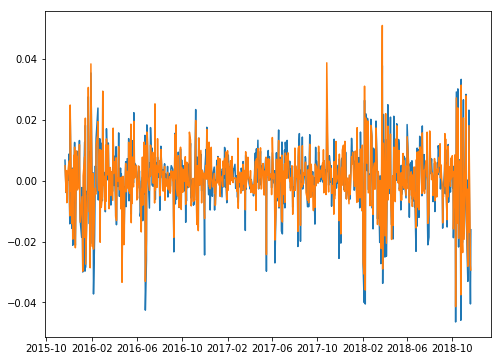

In [14]:
#Fitted Value Graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)  

In [15]:
#Regression Table2
import numpy as np
import statsmodels.api as sm
X = df1[['MSFT','IBM','AAPL']]
X = sm.add_constant(X)
y = df1['FTEC']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTEC   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.282e+04
Date:                Fri, 30 Nov 2018   Prob (F-statistic):               0.00
Time:                        20:58:49   Log-Likelihood:                -1264.0
No. Observations:                 757   AIC:                             2536.
Df Residuals:                     753   BIC:                             2554.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5087      0.638     -3.929      0.0

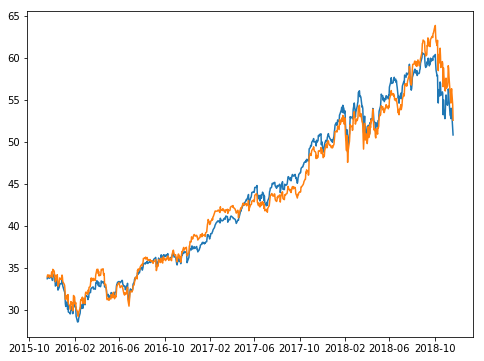

In [16]:
#Fitted Value Graph
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues) 

In [26]:
# Cassie - More about Time Series 
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
p = print

In [27]:
# A general function for generating four plots
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

/Users/user/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   MSFT   No. Observations:                  757
Model:                     ARMA(0, 7)   Log Likelihood               -2151.291
Method:                           mle   S.D. of innovations              4.115
Date:                Fri, 30 Nov 2018   AIC                           4318.583
Time:                        23:20:52   BIC                           4355.618
Sample:                             0   HQIC                          4332.847
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.MSFT     2.5385      0.038     66.024      0.000       2.463       2.614
ma.L2.MSFT     4.1604      0.068     60.849      0.000       4.026       4.294
ma.L3.MSFT     5.1616      0.090     57.563      0.0

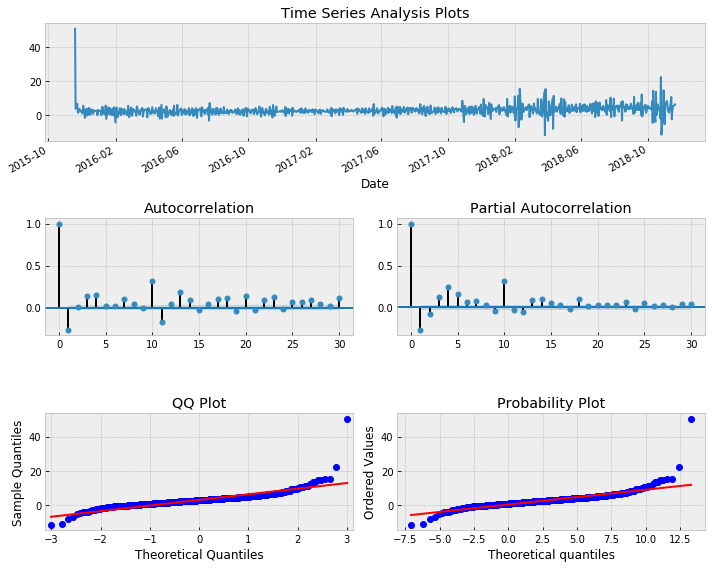

In [42]:
# Moving Average Models - MA(q)
# Data seem to be normalized (no heavy tail problem), but partial correlation still have an impact.
max_lag = 30
Y = df1_.MSFT
mdl = smt.ARMA(Y, order=(0, 7)).fit(
    maxlag=max_lag, method='mle', trend='nc')
p(mdl.summary())
_ = tsplot(mdl.resid, lags=max_lag)


In [ ]:
Basic Risk Analysis 1:
    Calculate the variance and std dev of a portfolio with same number of all stocks.
Basic Risk Analysis 2:
    Calculate the maximum sharpe ratio portfolio and the minimum volatility portfolio.
    The maximum sharpe ratio portfolio gives you the maximum return per unit of risk taken.

In [ ]:
# Namha  - Basic Risk Analysis 1 - calculating the variance and std dev of a portfolio containing all stocks equally.

df_adjclose_returns = df_adjclose.pct_change()
df_adjclose_returns.head()
# Construct a covariance matrix for the portfolio's daily returns with the .cov() method
cov_matrix_d = df_adjclose_returns.cov()
# Annualise the daily covariance matrix with the standard 250 trading days
cov_matrix_a = cov_matrix_d * 250
cov_matrix_a
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 
weights = np.array([0.25, 0.25, 0.25, 0.25])
weights

# Calculate the variance with the formula
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
print (str(round(port_variance, 4) * 100) + '%')  # Just converting the variance float into a percentage

#  The standard deviation of a portfolio is just a square root of its variance
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
print(str(round(port_volatility, 4) * 100) + '%')

In [ ]:
# Namha - efficient frontier analysis  
# what combination of stocks is the best to reduce the risk or maximise the return?

stocks = ['AAPL', 'FTEC', 'IBM', 'MSFT']

# calculate daily and annual returns of the stocks
returns_daily = df_adjclose.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(stocks)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

print('the minimum variance portfolio is:')
print(min_variance_port.T)

print('the maximum sharpe ratio portfolio is:')
print(sharpe_portfolio.T)

In [29]:
#Ishan

# Isolate the adjusted closing price
all_adj_close = df_i[['Adj Close']]

# Calculate the returns 
all_rtrns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_rtrns.iloc[all_rtrns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_rtrns.iloc[all_rtrns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Isolate the IBM returns
ibm_returns = all_rtrns.iloc[all_rtrns.index.get_level_values('Ticker') == 'IBM']
ibm_returns.index = ibm_returns.index.droplevel('Ticker')

googl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'GOOGL']
googl_returns.index = googl_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data_i = pd.concat([aapl_returns, msft_returns,ibm_returns,googl_returns], axis=1)[1:]
return_data_i.columns = ['AAPL', 'MSFT','IBM','GOOGL']
return_data_i.head()



,AAPL,MSFT,IBM,GOOGL
Date,,,,
2000-01-04,-0.088078,-0.034364,-0.034534,NaN
2000-01-05,0.014528,0.010489,0.034534,NaN
2000-01-06,-0.090514,-0.034072,-0.017392,NaN
2000-01-07,0.046281,0.012983,-0.004395,NaN
2000-01-10,-0.017745,0.007265,0.038882,NaN


In [30]:
return_data_i.corr()

,AAPL,MSFT,IBM,GOOGL
AAPL,1.000000,0.407600,0.383248,0.330249
MSFT,0.407600,1.000000,0.486582,0.326432
IBM,0.383248,0.486582,1.000000,0.265678
GOOGL,0.330249,0.326432,0.265678,1.000000


In [31]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(return_data_i, test_size = 0.3)
x_train = train.iloc[0:,1:4]
y_train = train.iloc[0:,0:1]
x_test = test.iloc[0:,1:4]
y_test = test.iloc[0:,0:1]

In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Value at Risk

The VaR at 95% confidence interval can be defined informally as the maximum possible loss during the time if we exclude the worse outcomes whose probability is less than 95%.

For example, if the VaR is 0.01, and the company has invested 100 dollars, this means that the company is unlikely to lose more than $1 95 percent of the time.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab 
from scipy.stats import norm
!pip3 install tabulate
import datetime
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

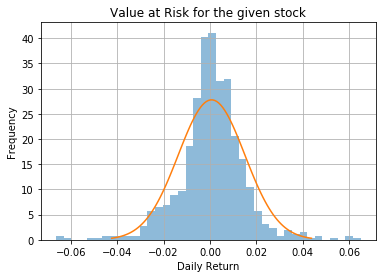

0.08: this is the 95% confience level value at risk


In [13]:
def var(i):
    start = datetime.datetime(2015,11,19)
    end = datetime.datetime(2018,11,19)
    df_adjclose_n = web.DataReader([i],'yahoo', start,end)
    df_adjclose_n['returns'] = df_adjclose_n['Adj Close'].pct_change()
    df_adjclose_n

# mean and standard deviation of the daily returns:

    mean = np.mean(df_adjclose_n['returns'])
    stddev = np.std(df_adjclose_n['returns'])
    df_adjclose_n['returns'].hist(bins = 40, normed = True, histtype = 'stepfilled', alpha = 0.5)
    x = np.linspace(mean - 3*stddev, mean + 3*stddev, 100)
    plt.plot(x, mlab.normpdf(x, mean, stddev))
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.title('Value at Risk for the given stock')
    plt.show()
    
# calculate the VAR using the point percentile function
    var_95conf = norm.pdf(1-0.95, mean, stddev)
    var_95conf= format(var_95conf, '.2f') 
    print(str(var_95conf) + ': this is the 95% confience level value at risk')
    return

var('AAPL')

In [4]:
#Ishan
#Building a trading strategy using moving average crossover for Apple Stocks
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.datetime.today())
# Initialize the short and long windows
short_window = 50
long_window = 200

# Initialize the `cues` DataFrame with the `cue` column
cues = pd.DataFrame(index=aapl.index)
cues['cue'] = 0.0

# Short window moving average
cues['short_moving_avg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Long window moving average
cues['long_moving_avg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Generate Cues
cues['cue'][short_window:] = np.where(cues['short_moving_avg'][short_window:] > cues['long_moving_avg'][short_window:], 1.0, 0.0)   

# Create positions
cues['positions'] = cues['cue'].diff()

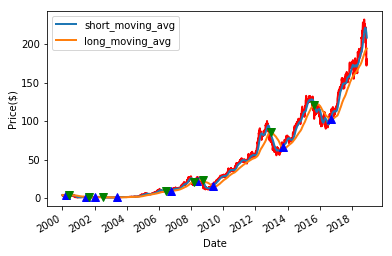

In [5]:
# Initialize the plot
plot = plt.figure()

# Add a subplot and label for y-axis
ax1 = plot.add_subplot(111,  ylabel='Price($)')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
cues[['short_moving_avg', 'long_moving_avg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(cues.loc[cues.positions == 1.0].index, 
         cues.short_moving_avg[cues.positions == 1.0],
         '^', markersize=8, color='b')
         
# Plot the sell signals
ax1.plot(cues.loc[cues.positions == -1.0].index, 
         cues.short_moving_avg[cues.positions == -1.0],
         'v', markersize=8, color='g')
         
# Show the plot
plt.show()

In [6]:
#Ishan
#Perform Backtesting

# Set the initial capital
initial_capital= float(100000.0)

# Create dataframe for positions
pos = pd.DataFrame(index=cues.index).fillna(0.0)

# Buy 100 shares
pos['AAPL'] = 50*cues['cue']   
  
# Create initial portfolio   
portfolio = pos.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = pos.diff()

# Add column for holdings
portfolio['holdings'] = (pos.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add column for cash
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add column for total(cash + holdings)
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add column for returnsreturns 
portfolio['returns'] = portfolio['total'].pct_change()
portfolio

,AAPL,holdings,cash,total,returns
Date,,,,,
2000-01-03,0.000000,0.000000,100000.000000,100000.000000,NaN
2000-01-04,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-05,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-06,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-07,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-10,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-11,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-12,0.000000,0.000000,100000.000000,100000.000000,0.000000
2000-01-13,0.000000,0.000000,100000.000000,100000.000000,0.000000


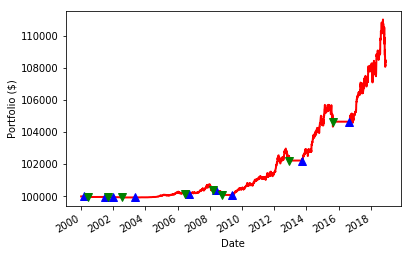

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio ($)')

# Generate the graph for equity values
portfolio['total'].plot(ax=ax1, lw=2.,color='r')

# Plot 'Going long' on the graph
ax1.plot(portfolio.loc[cues.positions == 1.0].index, 
         portfolio.total[cues.positions == 1.0],
         '^', markersize=8, color='b')

# Plot 'Going short' on the graph
ax1.plot(portfolio.loc[cues.positions == -1.0].index, 
         portfolio.total[cues.positions == -1.0],
         'v', markersize=8, color='g')

# Show the plot
plt.show()

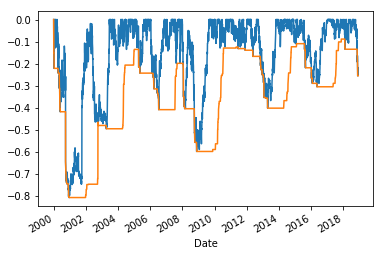

In [8]:
# Evaluating Moving Average Crossover Strategy

# annualized Sharpe ratio
portfolio['returns'] = portfolio['total'].pct_change()
returns = portfolio['returns']
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [9]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1
cagr

0.25439189459779943